# Principal Component Analysis (PCA)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
X_train

array([[1.369e+01, 3.260e+00, 2.540e+00, ..., 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, ..., 1.160e+00, 2.960e+00,
        3.450e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Applying PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


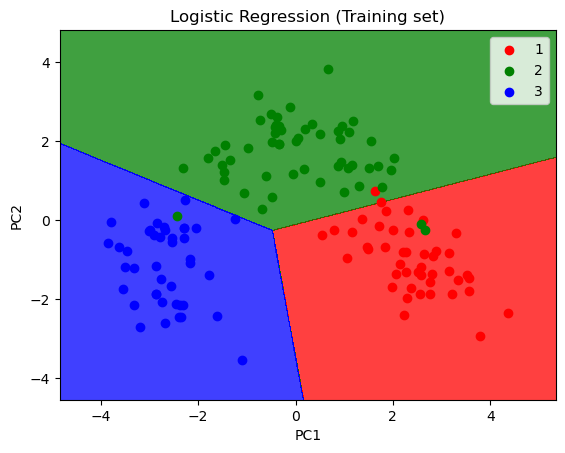

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


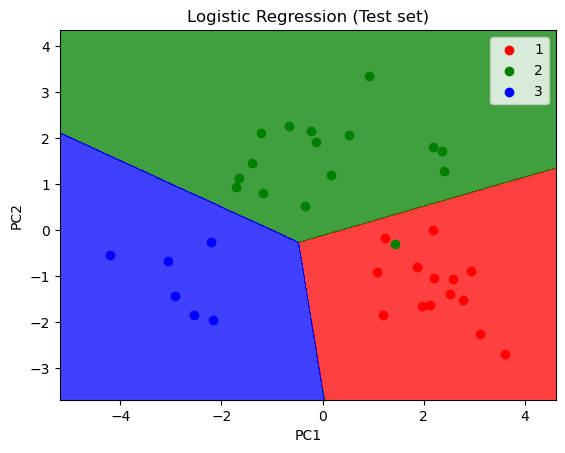

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()